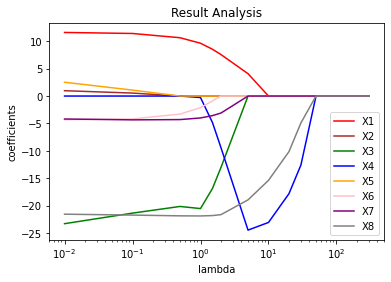

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import math

# load the diabetes dataset
df=pd.read_csv('data.csv')
target_name="Y"
target=df[target_name]



stand = np.std(df)
newdf = (df - df.mean())/np.std(df)

X=newdf[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y=df[['Y']]
lamb = [0.01, 0.1, 0.5, 1, 1.5, 2, 5, 10, 20, 30, 50, 100, 200, 300]
coefs = []
for i in range(8):
    coefs.append([])
lasso = Lasso()
for a in lamb:    
    lasso.set_params(alpha=a)
    lasso.fit(X, Y)
    for i in range(8):
        coefs[i].append(lasso.coef_[i])
    
colors = ['red', 'brown', 'green','blue','orange','pink', 'purple', 'grey']
ax = plt.gca()
plt.title('Result Analysis')
for i in range(8):
    ax.plot(lamb, coefs[i], color=colors[i], label='X' + str(i + 1))
    ax.set_xscale('log')

ax.legend()
plt.xlabel('lambda')
plt.ylabel('coefficients')

plt.show()